In [108]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import joblib


In [109]:
song_data = pd.read_csv('data_moods.csv')

le = LabelEncoder()
columns_to_drop = ['name', 'artist', 'id', 'album', 'release_date']
song_data = song_data.drop(columns=columns_to_drop)

song_data["mood_encoded"] = le.fit_transform(song_data["mood"])

In [110]:
mood_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(mood_mapping)

{'Calm': 0, 'Energetic': 1, 'Happy': 2, 'Sad': 3}


In [111]:
song_data

,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood,mood_encoded
0,68,379266,0.866,0.13700,0.7300,0.000000,0.0843,0.6250,-8.201,0.0767,118.523,5,4,Happy,2
1,43,318800,0.381,0.01890,0.8320,0.196000,0.1530,0.1660,-5.069,0.0492,120.255,8,4,Sad,3
2,60,217946,0.346,0.91300,0.1390,0.000077,0.0934,0.1160,-15.326,0.0321,136.168,0,4,Sad,3
3,2,233000,0.466,0.08900,0.4380,0.000006,0.1130,0.5870,-12.858,0.0608,193.100,4,4,Happy,2
4,60,268000,0.419,0.00171,0.9320,0.000000,0.1370,0.4450,-3.604,0.1060,169.881,1,4,Energetic,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681,36,123066,0.402,0.96100,0.2360,0.919000,0.0921,0.1460,-20.615,0.0603,129.736,0,3,Calm,0
682,5,435080,0.452,0.75700,0.5150,0.120000,0.1400,0.1910,-7.351,0.0255,80.537,11,4,Sad,3
683,87,169265,0.642,0.78600,0.3740,0.000000,0.0906,0.0799,-9.386,0.0545,124.099,4,4,Sad,3
684,76,219146,0.561,0.91300,0.0848,0.000026,0.1120,0.2060,-15.099,0.0404,102.128,2,4,Sad,3


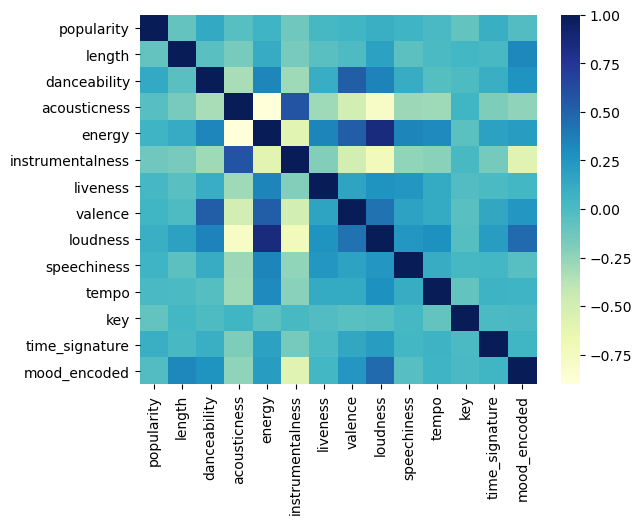

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(song_data.corr(),cmap="YlGnBu")
plt.show()

In [113]:
features = ['acousticness', 'danceability', 'energy', 'instrumentalness','length', 'liveness', 'loudness','valence']
X = song_data[features]
y = song_data["mood_encoded"]

In [114]:
from sklearn.model_selection import StratifiedShuffleSplit

# Setup the splitter: one split, 20% test
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Perform the split stratified by mood
for train_indices, test_indices in split.split(X, y):
    X_train = X.iloc[train_indices]
    X_test = X.iloc[test_indices]
    y_train = y.iloc[train_indices]
    y_test = y.iloc[test_indices]


In [115]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

feature_pipeline = Pipeline([
    ("scaler", StandardScaler())
])

# Fit and transform training data
X_train = feature_pipeline.fit_transform(X_train)

# Only transform test data
X_test = feature_pipeline.transform(X_test)



In [116]:
from pandas import read_csv
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RF', RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.786532 (0.049425)
LDA: 0.795556 (0.032722)
KNN: 0.790135 (0.050368)
CART: 0.735421 (0.050905)
NB: 0.802929 (0.038760)
SVM: 0.813838 (0.041426)
RF: 0.810337 (0.043508)


{'whiskers': [<matplotlib.lines.Line2D at 0x7fb64486a940>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb644877040>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb64486a5e0>,
 'medians': [<matplotlib.lines.Line2D at 0x7fb644877700>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb644877a60>,
 'means': []}

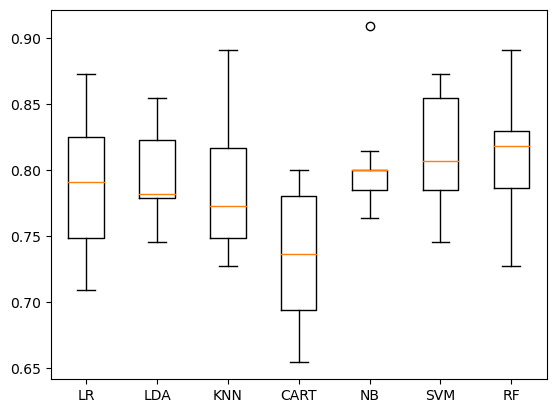

In [117]:
plt.boxplot(results, labels=names)

In [118]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = [
    {"n_estimators": [10, 100, 200, 500], 
     "max_depth": [None, 5 ,10], 
     "min_samples_split": [2, 3, 4]}
]
clf = RandomForestClassifier()

grid_search = GridSearchCV(clf, param_grid, cv=3, scoring="accuracy")
grid_search.fit(X_train, y_train)



GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             scoring='accuracy')

In [119]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le.classes_))
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

        Calm       0.88      0.92      0.90        39
   Energetic       0.71      0.81      0.76        31
       Happy       0.74      0.61      0.67        28
         Sad       0.85      0.82      0.84        40

    accuracy                           0.80       138
   macro avg       0.79      0.79      0.79       138
weighted avg       0.80      0.80      0.80       138

0.8043478260869565
[[36  0  0  3]
 [ 0 25  5  1]
 [ 0  9 17  2]
 [ 5  1  1 33]]


In [120]:
final_clf = grid_search.best_estimator_

In [121]:
final_clf.score(X_test, y_test)

0.8043478260869565

In [122]:
X_final = feature_pipeline.fit_transform(X)
y_final = y
prod_clf = RandomForestClassifier()

param_grid = [
    {"n_estimators": [10, 100, 200, 500], 
     "max_depth": [None, 5 ,10], 
     "min_samples_split": [2, 3, 4]}
]

grid_search = GridSearchCV(prod_clf, param_grid, cv=3, scoring="accuracy", return_train_score=True)
grid_search.fit(X_final, y_final)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [125]:
prod_final_clf = grid_search.best_estimator_

In [126]:
mood_test_data = pd.read_csv("top40_dataset.csv")

In [127]:
mood_test_data.info()
features = ['Acousticness', 'Danceability', 'Energy', 'Instrumentalness','Duration (ms)', 'Liveness', 'Loudness','Valence']
X = mood_test_data[features]
X_final = feature_pipeline.fit_transform(X)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track URI         40 non-null     object 
 1   Track Name        40 non-null     object 
 2   Album Name        40 non-null     object 
 3   Artist Name(s)    40 non-null     object 
 4   Release Date      40 non-null     object 
 5   Duration (ms)     40 non-null     int64  
 6   Popularity        40 non-null     int64  
 7   Explicit          40 non-null     bool   
 8   Added By          40 non-null     int64  
 9   Added At          40 non-null     object 
 10  Genres            18 non-null     object 
 11  Record Label      40 non-null     object 
 12  Danceability      40 non-null     float64
 13  Energy            40 non-null     float64
 14  Key               40 non-null     int64  
 15  Loudness          40 non-null     float64
 16  Mode              40 non-null     int64  
 17 

In [128]:
predictions = prod_final_clf.predict(X_final)
predictions = le.inverse_transform(predictions)

In [129]:
predictions

array(['Sad', 'Happy', 'Happy', 'Sad', 'Sad', 'Happy', 'Energetic',
       'Energetic', 'Sad', 'Energetic', 'Sad', 'Sad', 'Happy', 'Calm',
       'Sad', 'Happy', 'Sad', 'Energetic', 'Calm', 'Sad', 'Sad',
       'Energetic', 'Sad', 'Sad', 'Sad', 'Sad', 'Happy', 'Sad', 'Sad',
       'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad',
       'Energetic', 'Sad', 'Happy'], dtype=object)

In [130]:
final_df = pd.DataFrame(mood_test_data['Track Name'])
final_df['Predicted Mood'] = predictions
final_df

,Track Name,Predicted Mood
0,Ordinary,Sad
1,Love Me Not (feat. Rex Orange County),Happy
2,Victory Lap,Happy
3,back to friends,Sad
4,Golden,Sad
5,Manchild,Happy
6,Your Idol,Energetic
7,undressed,Energetic
8,Folded,Sad
9,Soda Pop,Energetic
